In [1]:
using LinearAlgebra, Plots, KernelDensity, Symbolics, StatsPlots

In [2]:
P = [0 0 .5 .5; .5 .5 0 0; 0 0 .5 .5; .5 .5 0 0]
a = [1 0 0 0]

1×4 Matrix{Int64}:
 1  0  0  0

In [3]:
using Distributions
using StatsBase

In [4]:
T = 10

10

In [5]:
function exp_trial(s, T, p)
    N = rand(Binomial(T - s, p), 1)[1]
    if N == 0
        return NaN
    end
    inds = sample(s:T, N, replace = false)
    sinds = sort!(inds)
    V = y(sinds[1])
    for i in 2:length(sinds)
        if i % 2 == 0
            V -= y(sinds[i])
        else
            V += y(sinds[i])
        end
    end
    V += (N % 2) == 0 ? y(T)  : 0
    V, inds
end

function trial(s, T, p)
    flag = 1
    V = 0
    inds = []
    for t in s+1:T
        if rand() > (1 - p)
            if flag == 1
                V += y(t)
                flag = 0
            else
                V -= y(t)
                flag = 1
            end
            push!(inds, t)
        end
    end
    V + flag * y(T), inds
end

function mu_proxima_trial(s, T, p, t)
    N = rand(Binomial(T - s, p), 1)[1]
    if N == 0
        return NaN
    end
    inds = sample(s:T, N, replace = false)
    inds[rand(1:N)] = t
    sinds = sort!(inds)
    V = y(sinds[1])
    for i in 2:length(sinds)
        if i % 2 == 0
            V -= y(sinds[i])
        else
            V += y(sinds[i])
        end
    end
    V += (N % 2) == 0 ? y(T)  : 0
    V
end
function short_proxima_trial(s, T, p, t)
    N = rand(Binomial(T - s, p), 1)[1]
    if N == 0
        return NaN
    end

    inds = sample(s:T, N, replace = false)
    replacement_ind = rand(1:N)
    inds[replacement_ind] = t
    psinds = sortperm(inds)
    sinds = sort!(inds)
    
    while psinds[replacement_ind] % 2 == 0
        N = rand(Binomial(T - s, p), 1)[1]
        if N == 0
            return NaN
        end
        inds = sample(s:T, N, replace = false)
        replacement_ind = rand(1:N)
        inds[replacement_ind] = t
        psinds = sortperm(inds)
        sinds = sort!(inds)
    end


    V = y(sinds[1])
    for i in 2:length(sinds)
        if i % 2 == 0
            V -= y(sinds[i])
        else
            V += y(sinds[i])
        end
    end
    V += (N % 2) == 0 ? y(T)  : 0
    V
end

function long_proxima_trial(s, T, p, t)
    N = rand(Binomial(T - s, p), 1)[1]
    if N == 0
        return NaN
    end

    inds = sample(s:T, N, replace = false)
    replacement_ind = rand(1:N)
    inds[replacement_ind] = t
    psinds = sortperm(inds)
    sinds = sort!(inds)
    
    while psinds[replacement_ind] % 2 != 0
        N = rand(Binomial(T - s, p), 1)[1]
        if N == 0
            return NaN
        end
        inds = sample(s:T, N, replace = false)
        replacement_ind = rand(1:N)
        inds[replacement_ind] = t
        psinds = sortperm(inds)
        sinds = sort!(inds)
    end


    V = y(sinds[1])
    for i in 2:length(sinds)
        if i % 2 == 0
            V -= y(sinds[i])
        else
            V += y(sinds[i])
        end
    end
    V += (N % 2) == 0 ? y(T)  : 0
    V
end

function null_proxima_trial(s, T, p, t)
    N = rand(Binomial(T - s, p), 1)[1]
    if N == 0
        return NaN
    end

    inds = sample(s:T, N, replace = false)

    if t in inds
        inds = sample(s:T, N, replace = false)
    end

    sinds = sort!(inds)


    V = y(sinds[1])
    for i in 2:length(sinds)
        if i % 2 == 0
            V -= y(sinds[i])
        else
            V += y(sinds[i])
        end
    end
    V += (N % 2) == 0 ? y(T)  : 0
    V
end

null_proxima_trial (generic function with 1 method)

In [25]:
function proxima_trial(s, T, p, t)
    N = rand(Binomial(T - s, p), 1)[1]
    if N == 0
        return NaN
    end
    inds = sample(s:T, N, replace = false)
    if t in inds
        inds = sample(s:T, N, replace = false)
    end
    sinds = sort!(inds)
    V = y(sinds[1])
    for i in 2:length(sinds)
        if i % 2 == 0
            V -= y(sinds[i])
        else
            V += y(sinds[i])
        end
    end
    V += (N % 2) == 0 ? y(T)  : 0
    V, sinds
end

proxima_trial (generic function with 1 method)

In [6]:
function nanmu(x)
    mean(x[.!isnan.(x)])
end

nanmu (generic function with 1 method)

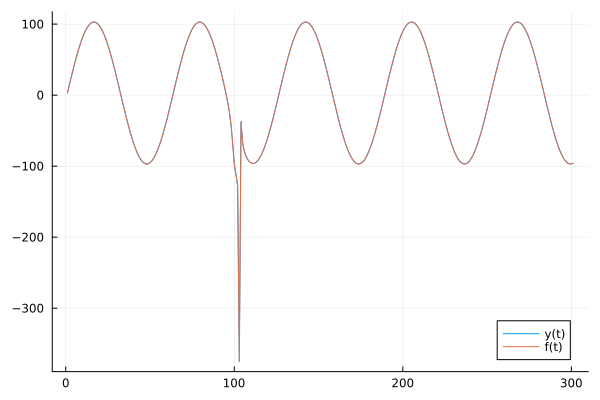

In [72]:
s, T, m = 0, 300, 8
f(t) = 100*sin(t/10) + 2 * (t*2 + t +2)/((t - 100)^3 - 10) + 3
p = .5
y(t) = f(t) + randn() * 0.0 * f(t)
plot(y.(s:T), label = "y(t)")
plot!(f.(s:T), label = "f(t)")


In [81]:
rets, sinds = unzip(*proxima_trial(s, T, p, 100))

ErrorException: syntax: "*" is not a unary operator

In [8]:
function nanmax(x)
    maximum(x[.!isnan.(x)])
end
function nonnan(x)
    x[.!isnan.(x)]
end

nonnan (generic function with 1 method)

In [9]:
function get_kde(trials)
    dropnan = trials[.!isnan.(trials)]
    return kde(dropnan)
end

get_kde (generic function with 1 method)

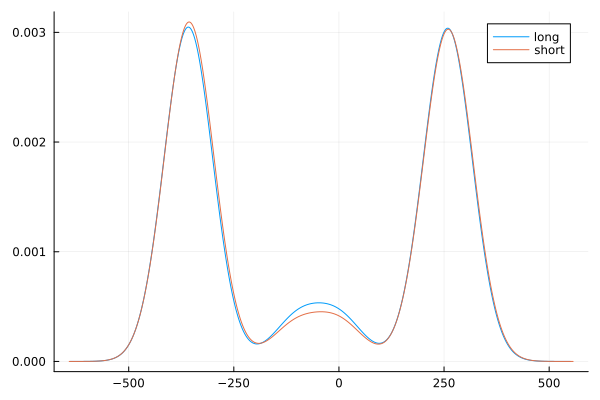

In [10]:
t = 101
kde_long = get_kde([long_proxima_trial(s, T, p, t) for _ in 1:3000])
kde_short = get_kde([short_proxima_trial(s, T, p, t) for _ in 1:3000])
plot(kde_long.x, kde_long.density, label = "long")
plot!(kde_short.x, kde_short.density, label = "short")

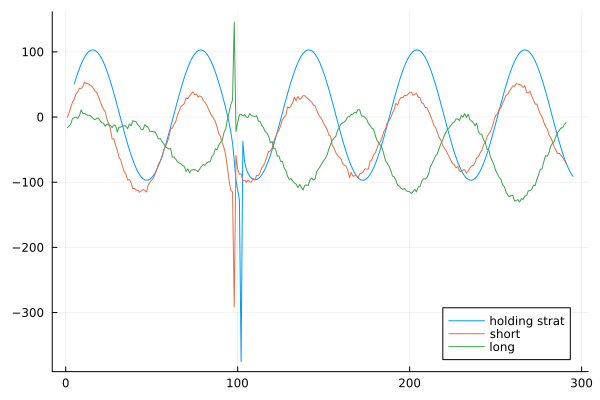

In [11]:
p = .01
plot((s+5):(T - 5),  t -> f(t), label = "holding strat")
# plot!([nanmu([mu_proxima_trial(s, T, p, t) for _ in 1:1000]) for t in (s+5):(T - 5)], label = "mu")
plot!([nanmu([short_proxima_trial(s, T, p, t) for _ in 1:3000]) for t in (s+5):(T - 5)], label = "short")
plot!([nanmu([long_proxima_trial(s, T, p, t) for _ in 1:3000]) for t in (s+5):(T - 5)], label = "long")
# plot!([nanmax([long_proxima_trial(s, T, p, t) for _ in 1:1000]) for t in (s+5):(T - 5)], label = "long")
# plot!([nanmu([null_proxima_trial(s, T, p, t) for _ in 1:1000]) for t in (s+5):(T - 5)], label = "null")

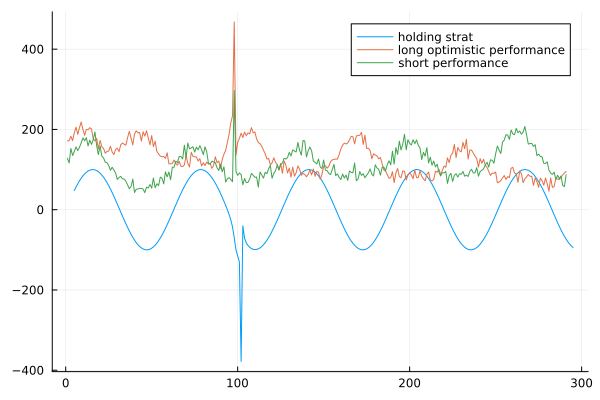

In [12]:
p = 0.01
long_trials = [nonnan([long_proxima_trial(s, T, p, t) for _ in 1:1000]) for t in (s+5):(T - 5)]
short_trials = [nonnan([short_proxima_trial(s, T, p, t) for _ in 1:1000]) for t in (s+5):(T - 5)]
null_trials = [nonnan([null_proxima_trial(s, T, p, t) for _ in 1:1000]) for t in (s+5):(T - 5)]
plot((s+5):(T - 5),  t -> f(t) - f(s), label = "holding strat")
plot!([quantile(trial, .9) - f(s) for trial in long_trials], label = "long optimistic performance")
plot!([quantile(trial, .9) - f(s) for trial in short_trials], label = "short performance")
# plot!([quantile(trial, .6) - f(s) for trial in null_trials])

# plot!(t -> quantile(long_trials[t - s - 4], .6) - f(s), label = "long")
# plot!(t -> quantile(short_trials[t - s - 4], .6) - f(s), label = "short")
# plot!(t -> quantile(null_trials[t - s - 4], .6) - f(s), label = "null")

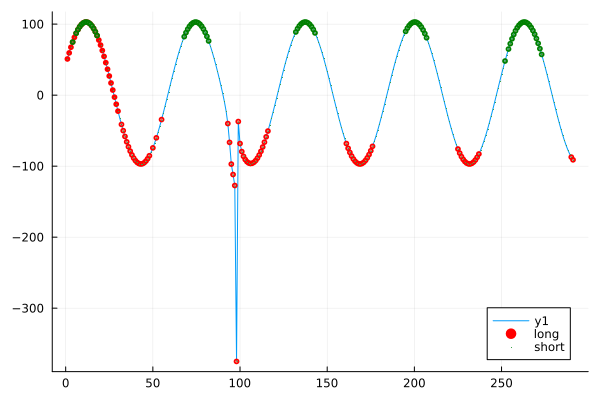

In [13]:
q = .8
long_signal = [quantile(long_trial, q) -  quantile(null_trial, q) for (long_trial, null_trial) in zip(long_trials, null_trials)]
short_signal = [quantile(short_trial, q) -  quantile(null_trial, q) for (short_trial, null_trial) in zip(short_trials, null_trials)]
plot(f.((s+5):(T - 5)))
scatter!(f.((s+5):(T - 5)), marker = long_signal .> 0, label = "long", markerstrokewidth = 5, markerstrokecolor = :red)
scatter!(f.((s+5):(T - 5)), marker = short_signal .> 0, label = "short", markerstrokewidth = 5, markerstrokecolor = :green)
# plot!([quantile(trial, .9) - f(s) for trial in null_trials], label = "null")
# mean(long_signal .> 0)

In [14]:
f(100)

-111.80211108893698

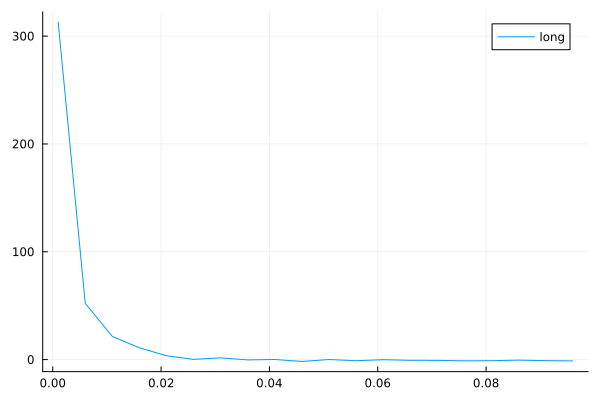

In [24]:
t = 20
trials = [nonnan([short_proxima_trial(s, T, p, t) for _ in 1:1000]) |> x -> quantile(x, .5)/((T-s)*p) for p in 0.001:0.005:.1]
plot(0.001:0.005:.1, trials, label = "long")
# plot!(0.1:0.01:1, t -> f(T), label = "holding strat")

In [16]:
function mu_r(s, T, p, f, n)
    cur = 0
    for _ in 1:n
        i = rand(s:(T-1), 1)[1]
        while i + 1/p > T || f(i) == 0
            i = rand(s:(T-1), 1)[1]
        end
        cur += (f(i+1/p) - f(i)) / (f(i))
    end
    cur / n
end
function mu_d(s, T, p, f, n)
    cur = 0
    for _ in 1:n
        i = rand(s:(T-1), 1)[1]
        while i + 1/p > T || f(i) == 0
            i = rand(s:(T-1), 1)[1]
        end
        cur += (f(i+1/p) - f(i))
    end
    cur / n
end

mu_d (generic function with 1 method)

In [17]:
m_r, m_d = mu_r(s, T, p, f, 10_000), mu_d(s, T, p, f, 10_000)
m_r, m_d

(-1.9188350148043882, -7.533264751504394)

In [18]:
trials = [trial(s, T, p)[1] for i in 1:10000]
nanmean = mean(trials[.!isnan.(trials)])
nanstd = std(trials[.!isnan.(trials)])
exp_trials = [exp_trial(s, T, p)[1] for i in 1:10000]
exp_nanmean = mean(exp_trials[.!isnan.(exp_trials)])
exp_nanstd = std(exp_trials[.!isnan.(exp_trials)])
mu_f = mean([f(t) for t in s+1:T])
nanmean, nanstd, exp_nanmean, exp_nanstd, f(T) * .5 + mean([f(t) for t in s:T]) - f(s) * .5, f(T) - f(s), mean([f(t) for t in s:T]) - f(T) 
# ( |> mean), ([trial(s, T) for i in 1:10000] |> std), f(T) * .5 + f(s) * .5, f(T) - f(s)
[
    :trial_return => nanmean,
    :trial_std => nanstd,
    :exp_trial_return => exp_nanmean,
    :exp_trial_std => exp_nanstd,
    :Holding_strat => f(T),
    :expected_returns => f(T)/2 + f(s+1/p)/2,
    :expected_returns_mu => f(T)/2 + mean([f(t) for t in s+1:T])/2,
    :expected_returns_3 => sum(x*(-1)^(i+1) for (i, x) in enumerate(f.(s:2:T))),
    :expected_returns_4 => (m/p)*(T*p)/2,
    :expected_returns_5 => (mu_d(s, T, p, f, 100_000)*T*p/2 + f(s))
]

10-element Vector{Pair{Symbol, Float64}}:
        :trial_return => -37.92699957355978
           :trial_std => 136.30631040376252
    :exp_trial_return => -33.27173687278145
       :exp_trial_std => 138.30440541175324
       :Holding_strat => -95.80293690900432
    :expected_returns => -103.80252399897066
 :expected_returns_mu => -45.900490622019475
  :expected_returns_3 => 233.19573456560892
  :expected_returns_4 => 1200.0
  :expected_returns_5 => -8.3704030372828

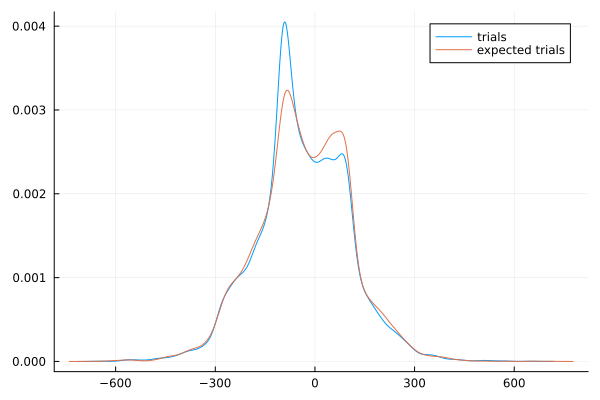

In [20]:
plot(kde(trials[.!isnan.(trials)]).x, kde(trials[.!isnan.(trials)]).density, label = "trials")
plot!(kde(exp_trials[.!isnan.(exp_trials)]).x, kde(exp_trials[.!isnan.(exp_trials)]).density, label = "expected trials")

In [21]:
n = 5

5